In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def f(A, B):
    return np.sin(np.sqrt(A**2 + B**2))

In [3]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)

z = f(x, y)

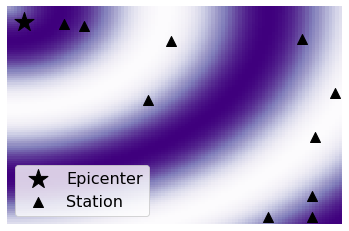

In [4]:
ax = sns.heatmap(z, cmap='Purples',cbar=False)
ax.scatter(5, 7, s=400, marker='*', c='k', label = 'Epicenter')
i = np.random.randint(0, 100, 10)
j = np.random.randint(0, 100, 10)
ax.scatter(i, j, s = 100, marker='^', c = 'k', label = 'Station')
ax.legend(prop={'size': 16})
plt.xticks([])
plt.yticks([])
plt.savefig('station.png')

In [5]:
np.random.randint(0, 100, 5)

array([12, 65, 70, 73, 73])

In [6]:
n = 500
train_data = f'../ISMP/dataset/trainset_v2_{n}_label4.jb'

In [7]:
X, y = joblib.load(train_data)

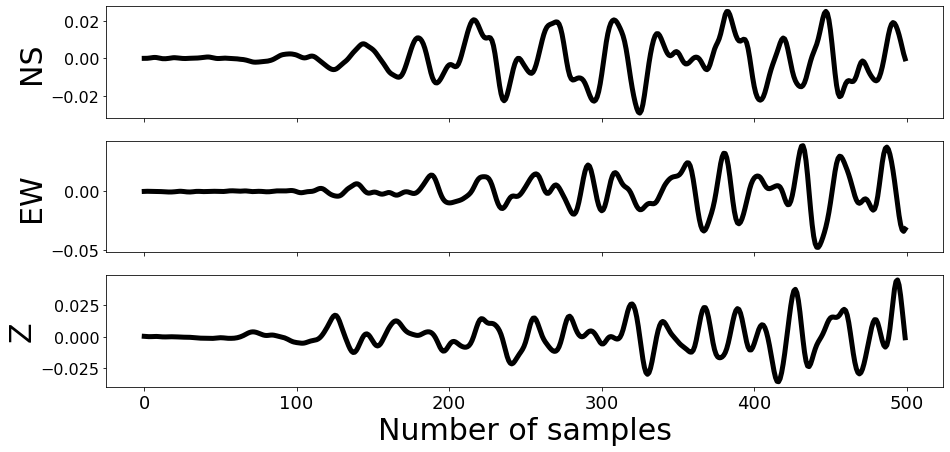

In [20]:
axis = {0:'NS', 1:'EW', 2:'Z'}
f, axs = plt.subplots(3,figsize=(15,7), sharex=True)

for i, sig in enumerate(X[0]):
    axs[i].plot(sig, c='k', linewidth=5)
    axs[i].set_ylabel(axis[i], fontdict={'size': 30})
    axs[i].tick_params(axis='x', labelsize=18)
    axs[i].tick_params(axis='y', labelsize=16)
axs[i].set_xlabel('Number of samples', fontdict={'size': 30})
plt.savefig('3-axis.png', dpi=100)

In [9]:
X = torch.tensor(X, dtype = torch.float)

In [10]:
cnn1d = nn.Conv1d(3, 5, kernel_size=5)
m = nn.MaxPool1d(5, stride=2)

In [11]:
x = cnn1d(X)
x = m(x)
x = F.leaky_relu(x)

In [12]:
x_cnn = x[0].detach().numpy()

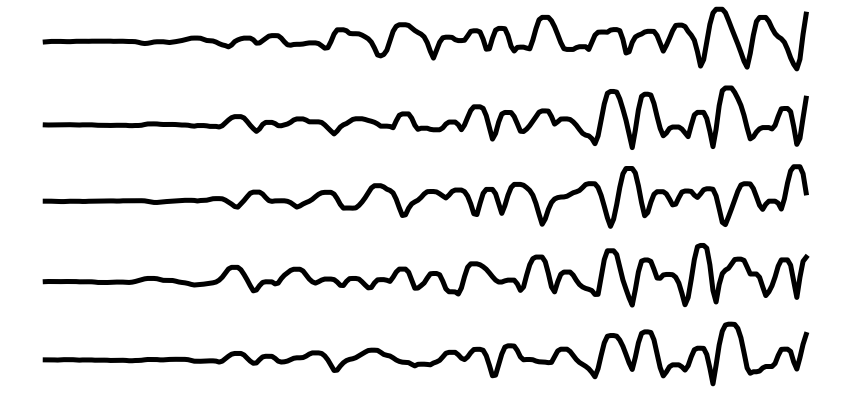

In [15]:
f, axs = plt.subplots(5,figsize=(15,7), sharex=True)

for i, sig in enumerate(x_cnn):
    axs[i].plot(sig, c='k', linewidth=5)
    axs[i].axis('off')
plt.savefig('cnn.png', dpi=100)